linear models can be quite limiting in lowdimensional spaces, as lines or hyperplanes have limited flexibility. One way to make a linear model more flexible is by adding more features, for example by adding interactions or polynomials of the input features 

In [20]:
import numpy as np
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

In [17]:
# preparing a synthetic data set
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

Text(0,0.5,'feature2')

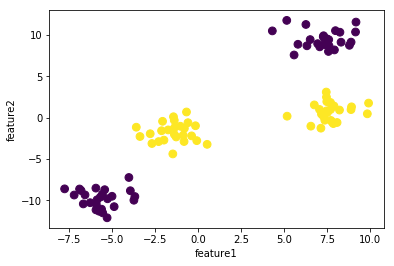

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
plt.xlabel("feature1")
plt.ylabel("feature2")

A linear model for classification can only separate points using a line, and will not be able to do a very good job on this dataset

Text(0,0.5,'feature2')

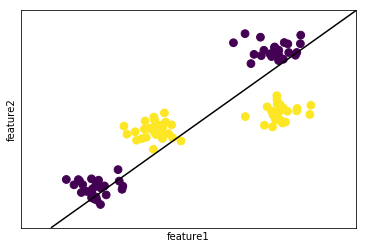

In [19]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
plt.xlabel("feature1")
plt.ylabel("feature2")

We can clearly see that the Linear Cassifier has performed very poorly for this dataset. Now, if we expand the set of input features by adding new feature.

In [21]:
X_new = np.hstack([X, X[:, 1:] ** 2])

Instead of representing each data point as a two-dimensional point (feature1, feature2), we now represent it as a threedimensional point (feature1, feature2, feature2 ** 2)

Text(0.5,0,'feature1 ** 2')

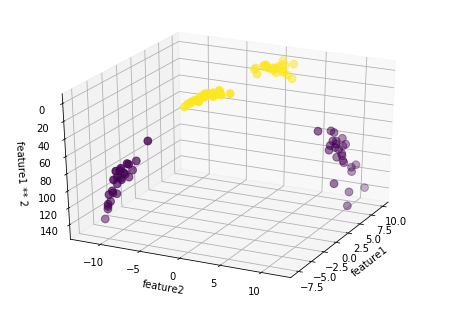

In [23]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, s=60)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

In the new, three-dimensional representation of the data, it is now indeed possible to separate the yellow and the purple points using a linear model, a plane in three dimensions.

Text(0.5,0,'feature1 ** 2')

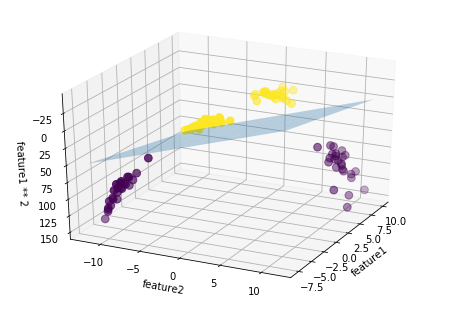

In [24]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, s=60)
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1 ** 2")

As a function of the original features, the linear SVM model is not actually linear anymore. It is not a line, but more of an ellipse

Text(0,0.5,'feature2')

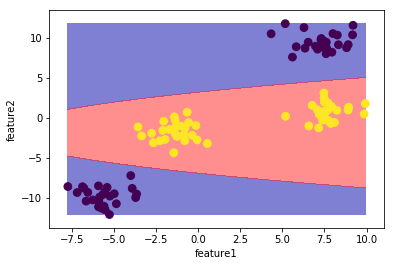

In [26]:
# considering the top view for the above visual we can confirm that that sides of tha planes we had fit are not parallel
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
plt.xlabel("feature1")
plt.ylabel("feature2")

Here we have added non-linear feature to the representation of our data which in tur made can make linear models much more powerful. However, often we don’t know which features to add, and adding many features will make computation very expensive.

Luckily, there is a clever mathematical trick called **kernel trick** that allows us to learn a classifier in a higher dimensional space without actually making it computationally expensive.

The kernel trick works by directly computing the distance (more precisely, the scalar products) of the data points for the expanded feature representation, without actually computing the expansion.

There are two ways to map your data into a higher dimensional space, that are commonly used with support vector machines: 
- **polynomial kernel** 
- **Radial basis function (rbf) kernel** also known as Gaussian kernel.

** Polynomial Kernel ** computes all possible polynomials up to a certain degree of the original features $$ \space like \space feature1^2 * feature2^5$$

** The Gaussian kernel ** is a bit harder to explain, as it corresponds to an infinite dimensional feature space. One way to explain the Gaussian kernel is that it considers all possible polynomials of all degrees, but the importance of the features decreases for higher degrees of polynomials.